<div style="background-image:url(images/header.svg); padding: 0px; background-size:cover; background-opacity:50%; border-radius:5px; height: 250px">
    <div style="float:right; margin: 50px; padding: 20px; background:rgba(255,255,255,0.7); width: 50%; height: 150px">
        <div style="position:relative; top:50%; transform: translateY(-50%)">
            <div style="font-size: xx-large; font-weight:900; color:rgba(0,0,0,0.8); line-height:100%">Noise</div>
            <div style="font-size: large; padding-top: 20px; color:rgba(0,0,0,0.5)">Lab: Probabilistic Power Spectral Densities</div>
        </div>
    </div>
</div>

Seismo-Live: http://seismo-live.org

##### Authors:
* Tobias Megies ([@megies](https://github.com/megies))

---

In [1]:
import matplotlib.pyplot as plt
plt.switch_backend("nbagg")
plt.style.use("bmh")
plt.rcParams['figure.figsize'] = 10, 6

 * read waveform data from file `data/GR.FUR..BHN.D.2015.361` (station `FUR`, [LMU geophysical observatory in Fürstenfeldbruck](https://www.geophysik.uni-muenchen.de/observatory/seismology))
 * read corresponding station metadata from file `data/station_FUR.stationxml`
 * print info on both waveforms and station metadata

1 Trace(s) in Stream:
GR.FUR..BHN | 2015-12-27T00:00:09.769999Z - 2015-12-28T00:00:11.669999Z | 20.0 Hz, 1728039 samples
Inventory created at 2016-05-03T10:14:19.000000Z
	Created by: JANE WEB SERVICE: fdsnws-station | Jane version: 0.0.0-gd6e1
		    http://jane/fdsnws/station/1/query?network=GR&station=FUR&starttime...
	Sending institution: Jane (Jane)
	Contains:
		Networks (1):
			GR
		Stations (1):
			GR.FUR (Fuerstenfeldbruck, Bavaria, GR-Net)
		Channels (2):
			GR.FUR..BHN, GR.FUR..HHN


<IPython.core.display.Javascript object>


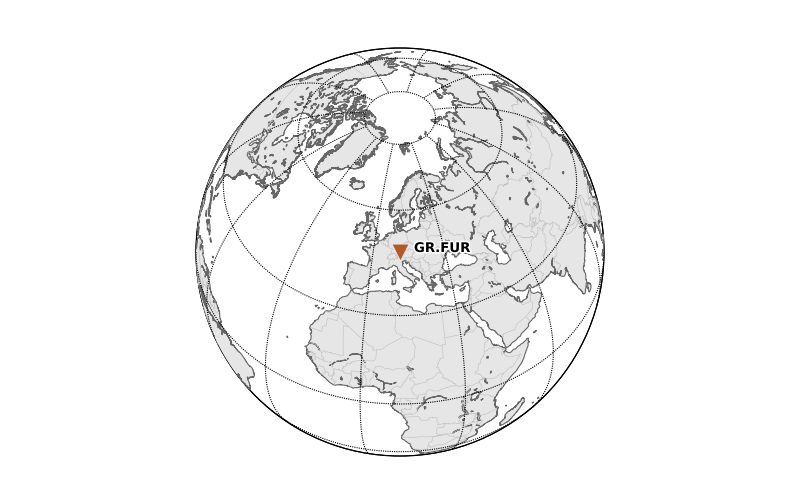

In [2]:
from obspy import read, read_inventory

st = read("data/GR.FUR..BHN.D.2015.361")
inv = read_inventory("data/station_FUR.stationxml")

print(st)
print(inv)
inv.plot(projection="ortho")

 * compute probabilistic power spectral densities using `PPSD` class from obspy.signal, see http://docs.obspy.org/tutorial/code_snippets/probabilistic_power_spectral_density.html (but use the inventory you read from StationXML as metadata)
 * plot the processed `PPSD` (`plot()` method attached to `PPSD` object)

<IPython.core.display.Javascript object>


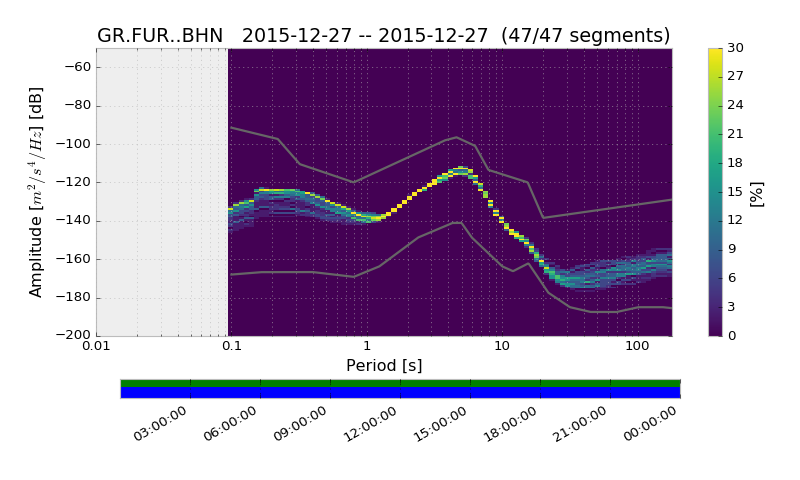

In [3]:
from obspy.signal import PPSD

tr = st[0]
ppsd = PPSD(stats=tr.stats, metadata=inv)

ppsd.add(tr)
ppsd.plot()

Since longer term stacks would need too much waveform data and take way too long to compute, we prepared one year continuous data preprocessed for a single channel of station `FUR` to play with..

 * load long term pre-computed PPSD from file `PPSD_FUR_HHN.npz` using `PPSD`'s `load_npz()` staticmethod (i.e. it is called directly from the class, not an instance object of the class)
 * plot the PPSD (default is full time-range, depending on how much data and spread is in the data, adjust `max_percentage` option of `plot()` option)  (might take a couple of minutes..!)
 * do a cumulative plot (which is good to judge non-exceedance percentage dB thresholds)

In [4]:
from obspy.signal import PPSD

ppsd = PPSD.load_npz("data/PPSD_FUR_HHN.npz")

<IPython.core.display.Javascript object>


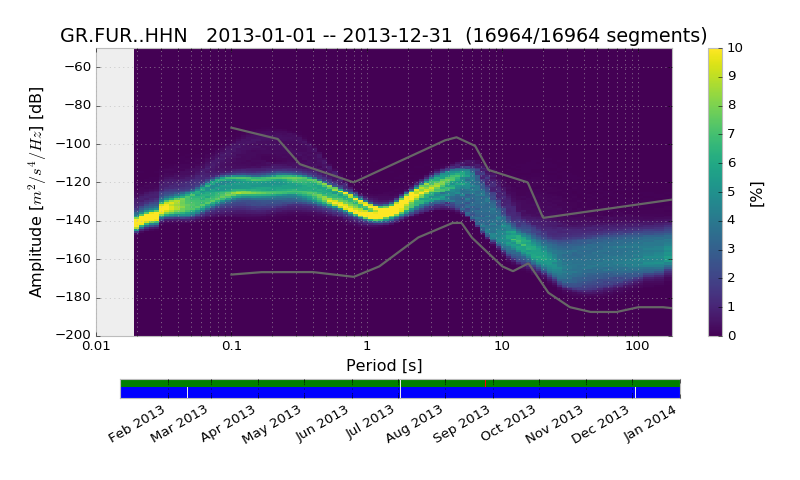

<IPython.core.display.Javascript object>


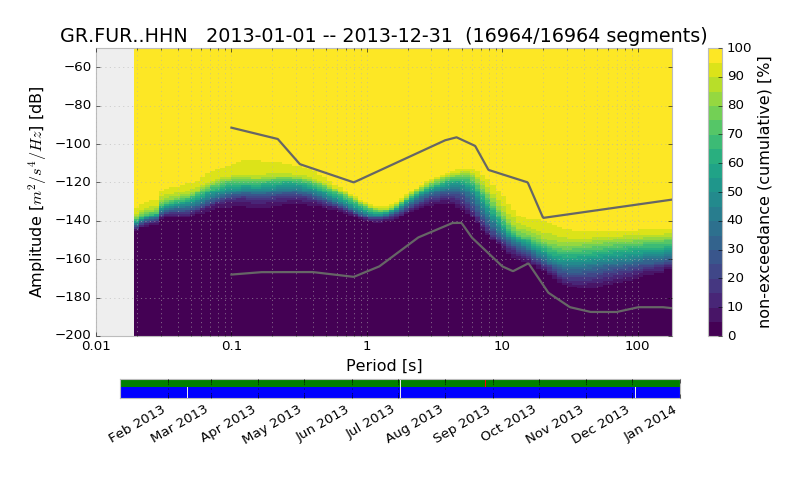

In [5]:
ppsd.plot(max_percentage=10)
ppsd.plot(cumulative=True)

 * do different stacks of the data using the [`calculate_histogram()` (see docs!)](http://docs.obspy.org/packages/autogen/obspy.signal.spectral_estimation.PPSD.calculate_histogram.html) method of `PPSD` and visualize them
 * compare differences in different frequency bands qualitatively (anthropogenic vs. "natural" noise)..
   * nighttime stack, daytime stack
 * advanced exercise: Use the `callback` option and use some crazy custom callback function in `calculate_histogram()`, e.g. stack together all data from birthdays in your family.. or all German holidays + Sundays in the time span.. or from dates of some bands' concerts on a tour.. etc.

<IPython.core.display.Javascript object>


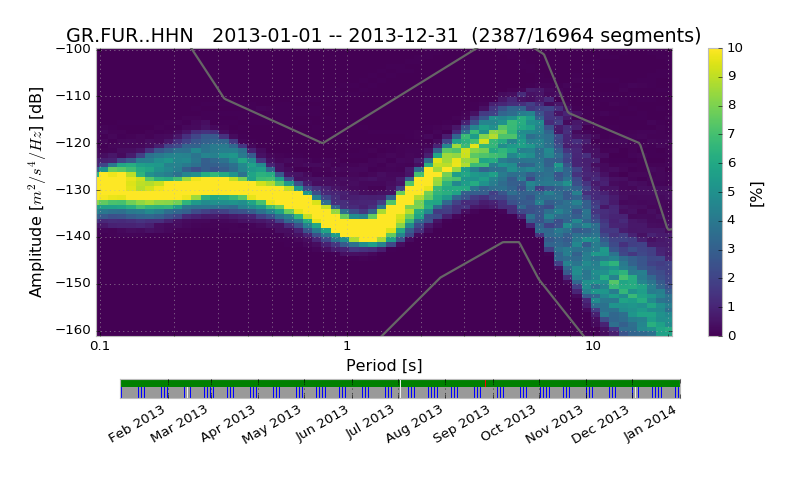

<IPython.core.display.Javascript object>


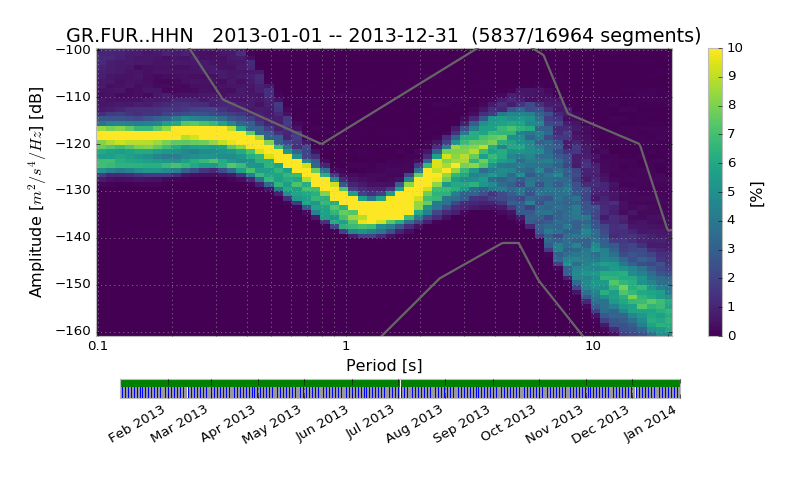

In [6]:
ppsd.calculate_histogram(time_of_weekday=[(-1, 0, 2), (-1, 22, 24)])
ppsd.plot(max_percentage=10)
ppsd.calculate_histogram(time_of_weekday=[(-1, 8, 16)])
ppsd.plot(max_percentage=10)

 * do different stacks of the data using the [`calculate_histogram()` (see docs!)](http://docs.obspy.org/packages/autogen/obspy.signal.spectral_estimation.PPSD.calculate_histogram.html) method of `PPSD` and visualize them
 * compare differences in different frequency bands qualitatively (anthropogenic vs. "natural" noise)..
   * weekdays stack, weekend stack

<IPython.core.display.Javascript object>


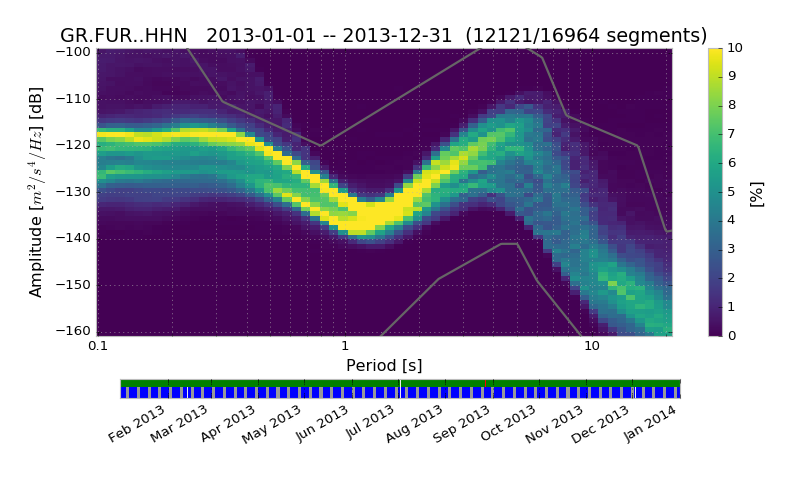

<IPython.core.display.Javascript object>


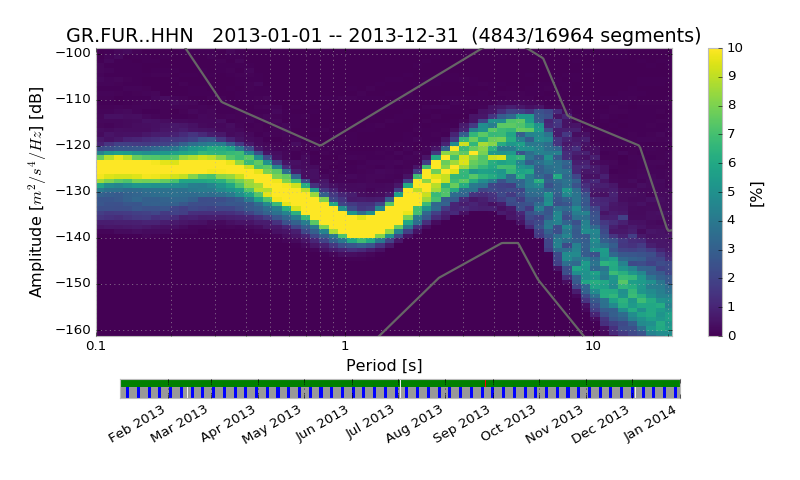

In [7]:
ppsd.calculate_histogram(time_of_weekday=[(1, 0, 24), (2, 0, 24), (3, 0, 24), (4, 0, 24), (5, 0, 24)])
ppsd.plot(max_percentage=10)
ppsd.calculate_histogram(time_of_weekday=[(6, 0, 24), (7, 0, 24)])
ppsd.plot(max_percentage=10)

 * do different stacks of the data using the [`calculate_histogram()` (see docs!)](http://docs.obspy.org/packages/autogen/obspy.signal.spectral_estimation.PPSD.calculate_histogram.html) method of `PPSD` and visualize them
 * compare differences in different frequency bands qualitatively (anthropogenic vs. "natural" noise)..
   * seasonal stacks (e.g. northern hemisphere autumn vs. spring/summer, ...)

<IPython.core.display.Javascript object>


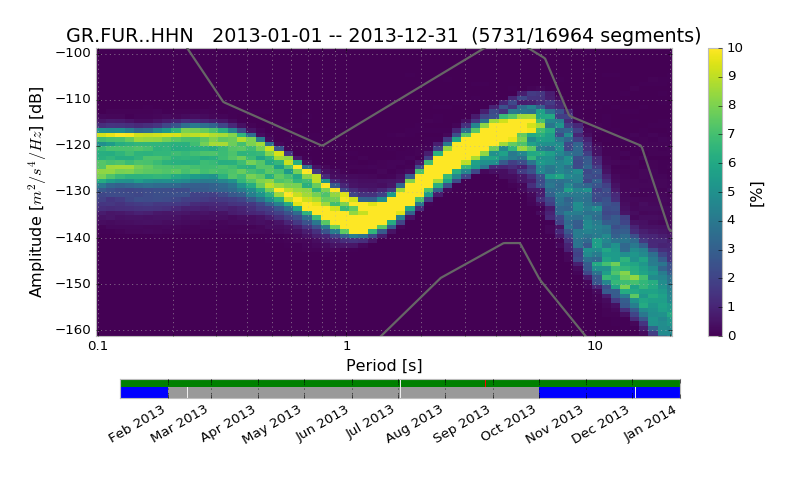

<IPython.core.display.Javascript object>


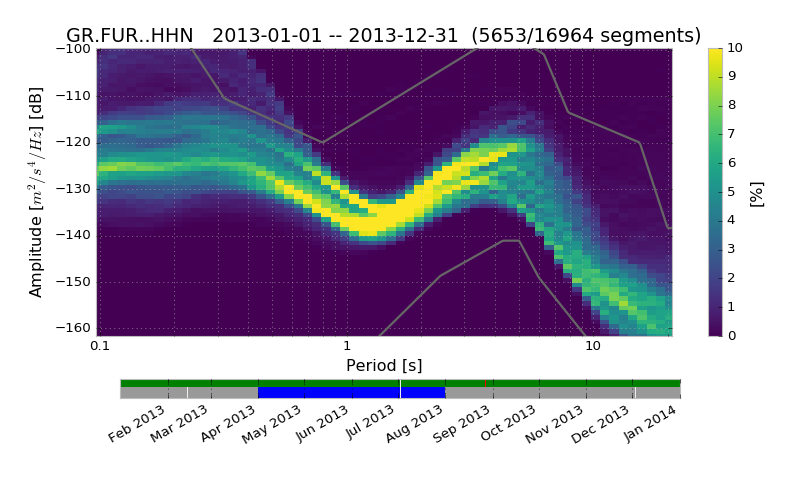

In [8]:
ppsd.calculate_histogram(month=[10, 11, 12, 1])
ppsd.plot(max_percentage=10)
ppsd.calculate_histogram(month=[4, 5, 6, 7])
ppsd.plot(max_percentage=10)

 * do different stacks of the data using the [`calculate_histogram()` (see docs!)](http://docs.obspy.org/packages/autogen/obspy.signal.spectral_estimation.PPSD.calculate_histogram.html) method of `PPSD` and visualize them
 * compare differences in different frequency bands qualitatively (anthropogenic vs. "natural" noise)..
   * stacks by specific month
   * maybe even combine several of above restrictions.. (e.g. only nighttime on weekends)